<a href="https://colab.research.google.com/github/Fa20/Deep_L/blob/main/Mnist_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [49]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


**Load the Dataset**

In [50]:
mnist = tf.keras.datasets.mnist

In [51]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [6]:
type(X_train)

numpy.ndarray

In [7]:
X_train[1,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[1:6]

array([0, 4, 1, 9, 2], dtype=uint8)

In [53]:
X_train=X_train/255.0
X_test=X_test/255.0

In [11]:
X_train[1,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Bulid our model**

In [127]:
model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),tf.keras.layers.Dense(512,activation='relu'),tf.keras.layers.Dropout(0.2),tf.keras.layers.Dense(10,activation='softmax')])

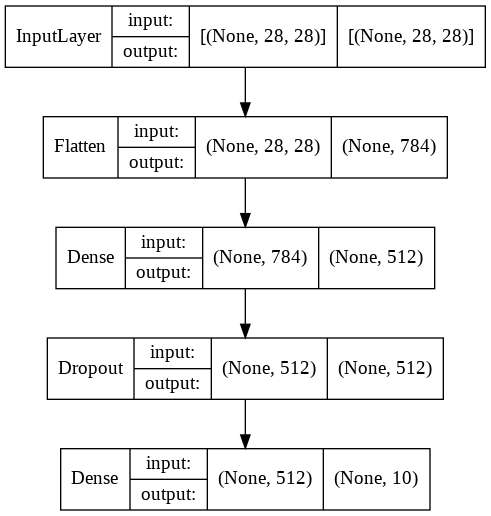

In [118]:
tf.keras.utils.plot_model(model,show_shapes=True,show_dtype=False,show_layer_names=False)

In [128]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [129]:
from sklearn.model_selection import train_test_split
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=13)

Epoch 1/13
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4889 - accuracy: 0.8731 - val_loss: 0.2484 - val_accuracy: 0.9326
Epoch 2/13
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2335 - accuracy: 0.9344 - val_loss: 0.1831 - val_accuracy: 0.9494
Epoch 3/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1779 - accuracy: 0.9502 - val_loss: 0.1500 - val_accuracy: 0.9577
Epoch 4/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1457 - accuracy: 0.9596 - val_loss: 0.1277 - val_accuracy: 0.9624
Epoch 5/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1218 - accuracy: 0.9661 - val_loss: 0.1109 - val_accuracy: 0.9677
Epoch 6/13
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1055 - accuracy: 0.9704 - val_loss: 0.0993 - val_accuracy: 0.9714
Epoch 7/13
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0916 - accuracy: 0.9749 - val_loss: 0.0914 - val_accur

In [130]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)  

In [131]:
print(acc)

0.980400025844574


In [132]:
print(loss)

0.0665426179766655


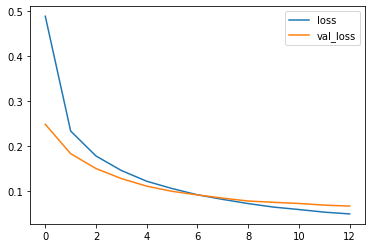

In [133]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

Confusion matrix : 



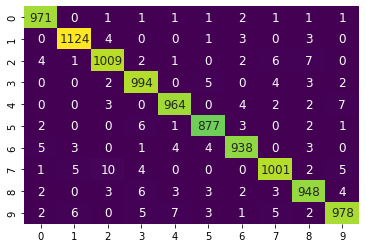

In [135]:

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true,preds):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds)
  print("Confusion matrix : \n")
  sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
  plt.show()
  return conf_matx
con_mat = draw_confusion_matrix(y_test, y_pred)
